In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasets/amazon.csv')

In [3]:
df.sample(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
147,B09CMQRQM6,Ambrane Fast 100W Output Cable with Type-C to ...,Computers&Accessories|Accessories&Peripherals|...,₹499,₹899,44%,4.2,919,Stay ahead and never miss out with a 5A fast c...,"AFPP23GZ4AVHPQZCTP3HRAABLJLA,AHRMZ6CNNUQLTLK7V...","Siddhartha G.,BABU ARIF,Parikshit giri,Adwait,...","R3IUYQZ1BP7QPB,R3RCM1DK0EBGWB,R34I2C57PM5OA3,R...","Durable,Good Product,Okay 👌,So far so good,An ...","The cable does support fast PD charging, I hav...",https://m.media-amazon.com/images/I/31y7uO5DU8...,https://www.amazon.in/Ambrane-Charging-480mbps...
248,B09BW2GP18,Croma 3A Fast charge 1m Type-C to All Type-C P...,Computers&Accessories|Accessories&Peripherals|...,₹129,"₹1,000",87%,3.9,295,Type-C to Type-C sync and charge cable support...,"AG3TIHPAHFYCX3XQ3TQ2OB5IAJXQ,AEEMOUFPIMWI2J6CN...","Aneesh See Yay,Narendra Choudhari,Amazon Custo...","R1TBHUMR0RV7AZ,R2BN9ZX0H3ZQV2,R2PMUD745GQT3E,R...","Great value for money,Iys good,Poor quality,Go...","Excellent product,It's just a day old now. Loo...",https://m.media-amazon.com/images/I/31qs7auuBK...,https://www.amazon.in/Croma-transfer-Durabilit...
489,B07WGPKMP5,"iQOO Z6 44W by vivo (Raven Black, 6GB RAM, 128...",Electronics|Mobiles&Accessories|Smartphones&Ba...,"₹15,499","₹20,999",26%,4.1,"19,253",44W FlashCharge|Snapdragon 680 comes with octa...,"AHWRZWPCTG6ICA7WTNLNNZXWFI5Q,AF2AASVYVSROFD7FX...","siddharth patnaik,Dr Sunilkumar H,Krishna,K. S...","R27MK332LTT5KS,R2TN6LNGD4FLYB,RVZJOLWLG5JZ9,R3...","Above average phone,Worth For The Money 💰,Okie...",I purchased the 6/128gb variant.To sum it up ...,https://m.media-amazon.com/images/I/41Lif4YWC2...,https://www.amazon.in/iQOO-Raven-Black-128GB-S...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df['discount_percentage'] = df['discount_percentage'].replace('%', '', regex=True).astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].replace('[,]', '', regex=True).astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

### Distribution of Product Ratings

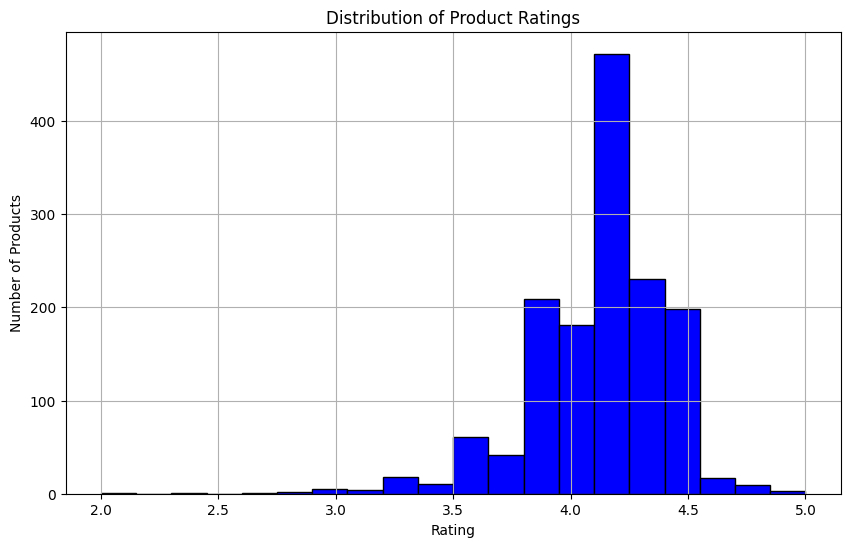

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(df['rating'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()

### Correlation between Discount Percentage and Rating

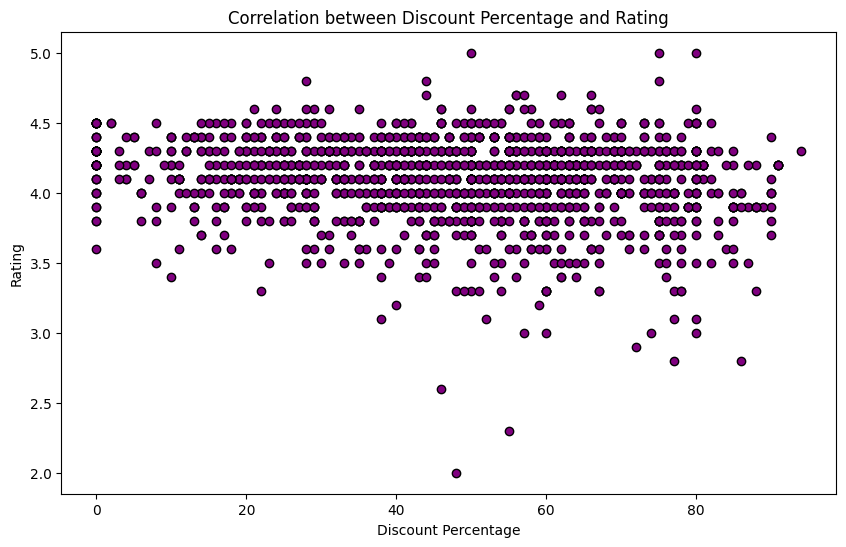

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['discount_percentage'], df['rating'], color='purple', edgecolor='black')
plt.title('Correlation between Discount Percentage and Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()

### Number of Products per Category

In [9]:
df['category'].value_counts()

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          233
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
                                                                                                                          ... 
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|RotiMakers                                                        1
Home&Kitchen|Heating,Cooling&AirQuality|Parts&Accessories|FanParts&Accessories                        

In [10]:
category_counts = df['category'].value_counts().head(10) 

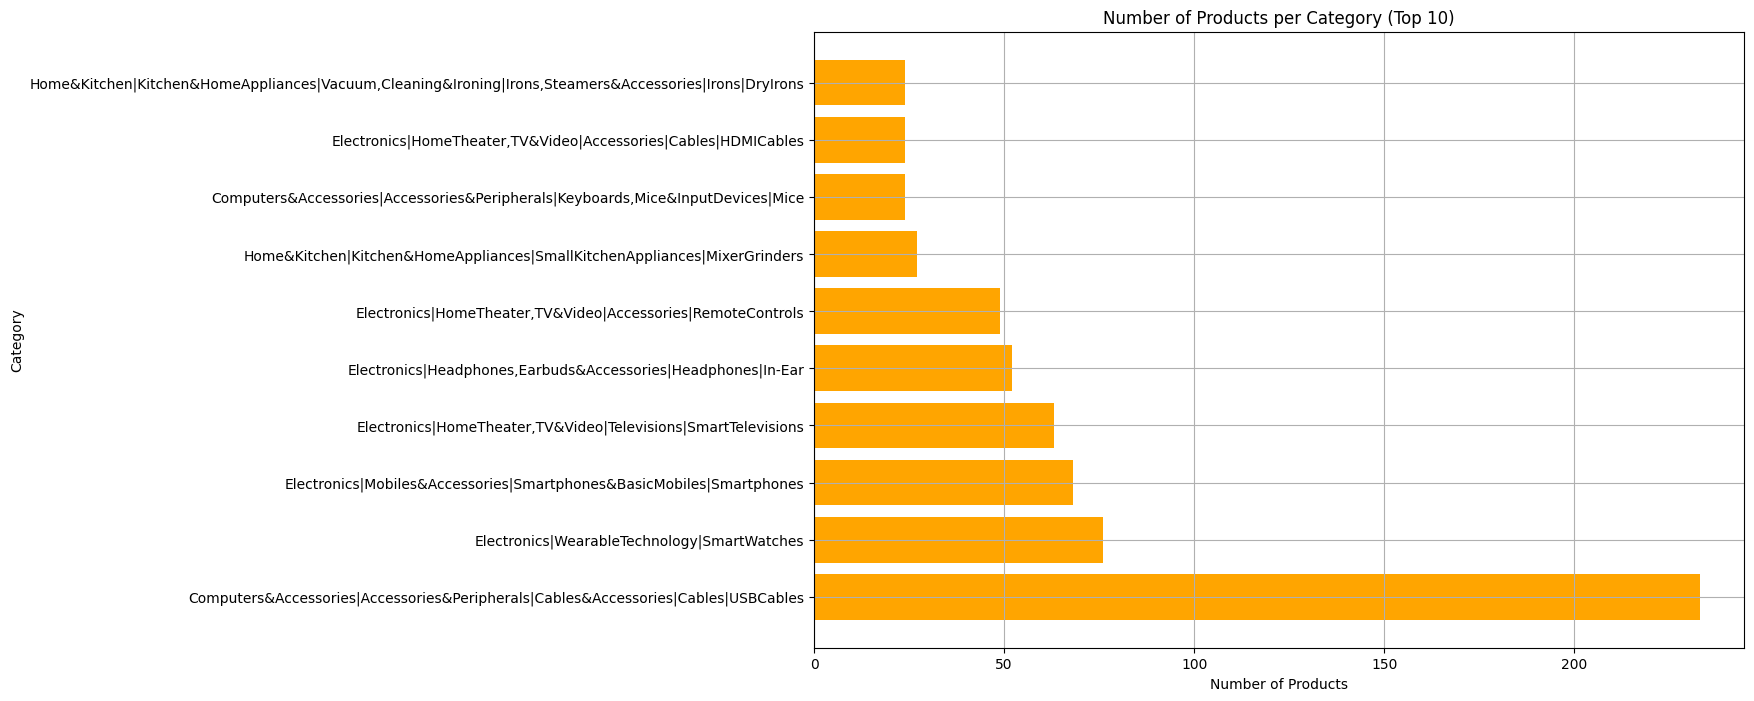

In [11]:
plt.figure(figsize=(12, 8))
plt.barh(category_counts.index, category_counts.values, color='orange')
plt.title('Number of Products per Category (Top 10)')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.grid()
plt.show()

### Top 10 Most Discounted Products

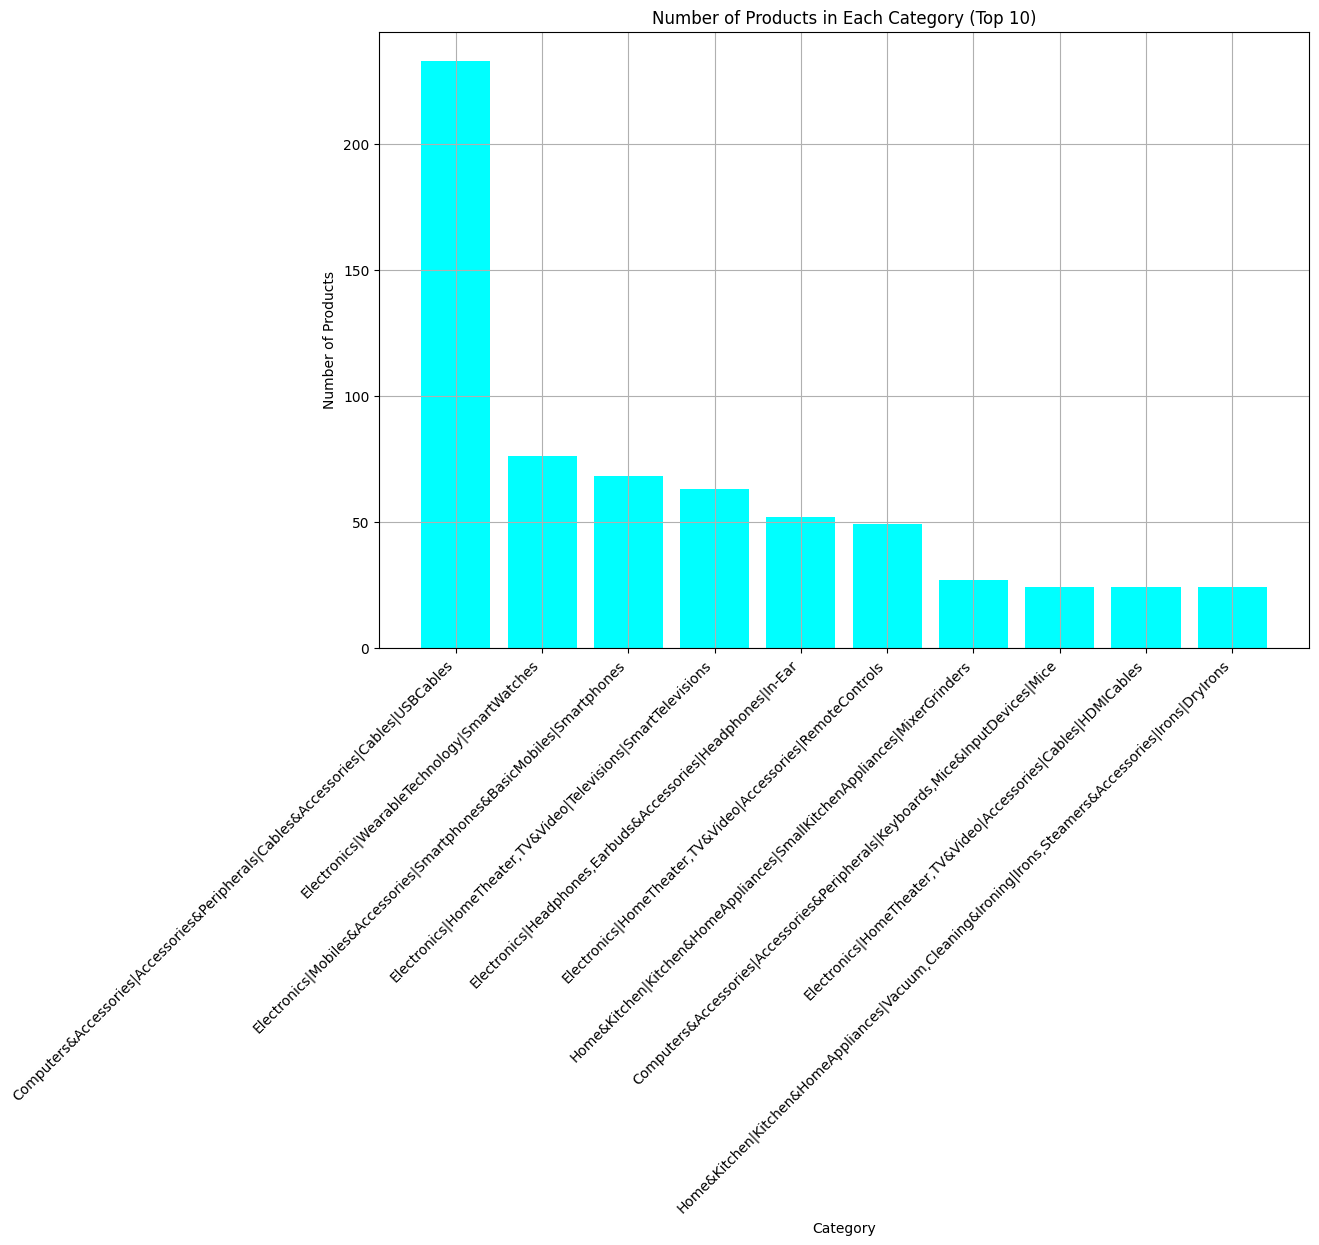

In [12]:
plt.figure(figsize=(12, 8))
category_counts = df['category'].value_counts().head(10)
plt.bar(category_counts.index, category_counts.values, color='cyan')
plt.title('Number of Products in Each Category (Top 10)')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

### Distribution of Top 5 Categories

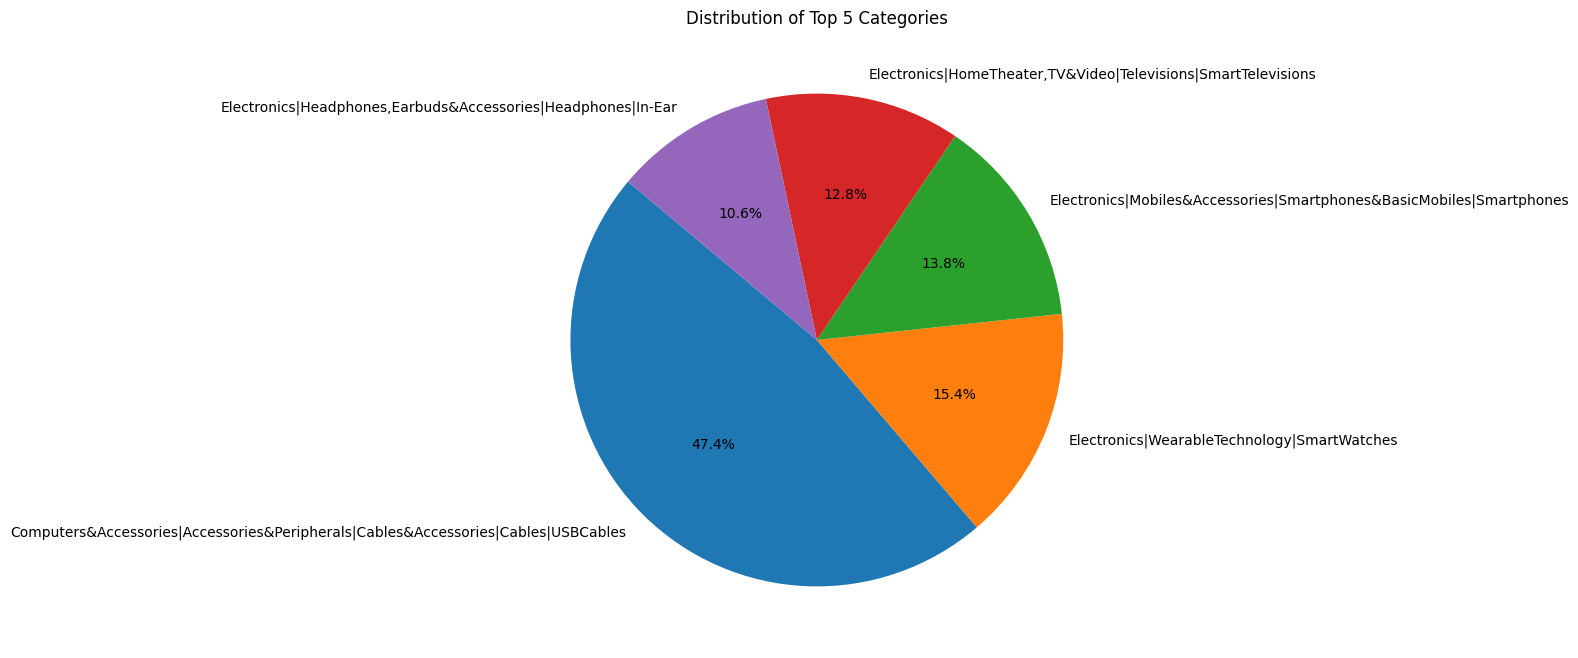

In [13]:
top_categories = df['category'].value_counts().head(5)
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 5 Categories')
plt.show()